In [18]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define base directories
base_dir = Path('/home/ubuntu/GORMPO_abiomed/cormpo/figures')
methods = {
    'VAE': 'vae',
    'KDE': 'kde',
    'RealNVP': 'realnvp',
    'Diffusion': 'diffusion',
    'NeuralODE': 'neuralode'
}

# Read all results
results_by_dataset = {}

for method_name, method_dir in methods.items():
    method_path = base_dir / method_dir
    if not method_path.exists():
        print(f"Method path not found: {method_path}")
        continue

    # Check if summary_results.json exists directly in method directory (flat structure)
    direct_results_file = method_path / 'summary_results.json'
    if direct_results_file.exists():
        print(f"Found direct results: {method_path}")
        with open(direct_results_file, 'r') as f:
            data = json.load(f)

        # Use 'abiomed' as the default dataset name for flat structure
        dataset_name = 'abiomed'
        if dataset_name not in results_by_dataset:
            results_by_dataset[dataset_name] = {}

        results_by_dataset[dataset_name][method_name] = data
        continue

    # Otherwise, look for dataset subdirectories
    for dataset_dir in method_path.iterdir():
        if dataset_dir.is_dir():
            dataset_name = dataset_dir.name
            print(f"Found dataset dir: {dataset_dir}")
            results_file = dataset_dir / 'summary_results.json'

            if results_file.exists():
                with open(results_file, 'r') as f:
                    data = json.load(f)

                if dataset_name not in results_by_dataset:
                    results_by_dataset[dataset_name] = {}

                results_by_dataset[dataset_name][method_name] = data

print(f"Found {len(results_by_dataset)} datasets:")
for dataset_name in results_by_dataset:
    print(f"  - {dataset_name}: {list(results_by_dataset[dataset_name].keys())}")

Found dataset dir: /home/ubuntu/GORMPO_abiomed/cormpo/figures/vae/abiomed
Found dataset dir: /home/ubuntu/GORMPO_abiomed/cormpo/figures/kde/abiomed
Found dataset dir: /home/ubuntu/GORMPO_abiomed/cormpo/figures/realnvp/abiomed
Found dataset dir: /home/ubuntu/GORMPO_abiomed/cormpo/figures/diffusion/abiomed
Found direct results: /home/ubuntu/GORMPO_abiomed/cormpo/figures/neuralode
Found 1 datasets:
  - abiomed: ['VAE', 'KDE', 'RealNVP', 'Diffusion', 'NeuralODE']



Creating plots for abiomed...
  Saved: /home/ubuntu/GORMPO_abiomed/cormpo/figures/merged_results/abiomed_comparison.png


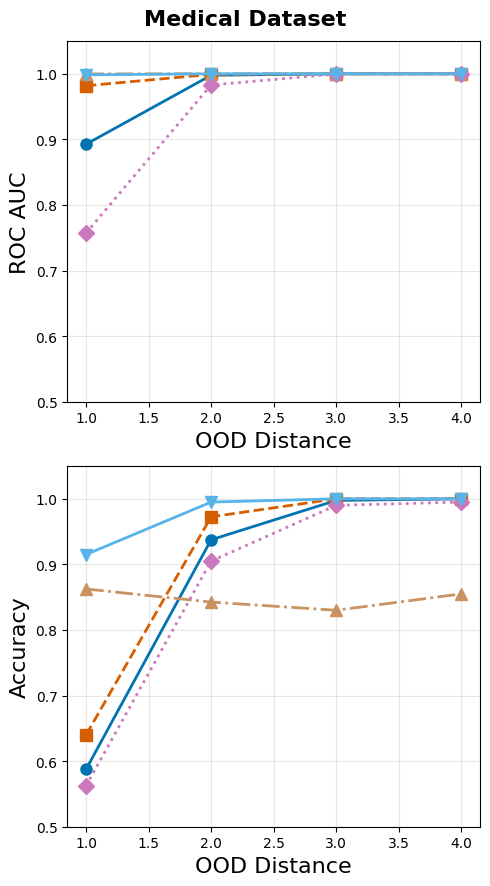


All plots created successfully!


In [41]:
# Define colors and markers for each method
import seaborn as sns
palette = sns.color_palette('colorblind')
colors = [palette[i] for i in [3, 0, 5, 4, 9]]
# Create plots for each dataset
method_styles = {
    'VAE': {'color': colors[1], 'marker': 'o', 'linestyle': '-'},
    'KDE': {'color': colors[0], 'marker': 's', 'linestyle': '--'},
    'RealNVP': {'color': colors[2], 'marker': '^', 'linestyle': '-.'},
    'Diffusion': {'color':  colors[3], 'marker': 'D', 'linestyle': ':'},
    'NeuralODE': {'color':  colors[4], 'marker': 'v', 'linestyle': '-'}
}

for dataset_name, methods_data in results_by_dataset.items():
    print(f"\nCreating plots for {dataset_name}...")
    
    # Create figure with 2x3 subplots
    fig, axes = plt.subplots(2, 1, figsize=(5,9))
    fig.suptitle(f'Medical Dataset', fontsize=16, fontweight='bold')
    
    # Plot 1: Mean Log-Likelihood
    # ax1 = axes[0, 0]
    # for method_name, data in methods_data.items():
    #     distances = [d['distance'] for d in data]
    #     mean_ll = [d['mean_log_likelihood'] for d in data]
    #     style = method_styles[method_name]
    #     ax1.plot(distances, mean_ll, label=method_name, 
    #             color=style['color'], marker=style['marker'], 
    #             linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    # ax1.set_xlabel('OOD Distance', fontsize=12)
    # ax1.set_ylabel('Mean Log-Likelihood', fontsize=12)
    # ax1.set_title('Mean Log-Likelihood vs OOD Distance', fontsize=14)
    # ax1.legend(fontsize=11)
    # ax1.grid(True, alpha=0.3)
    
    # Plot 2: ROC AUC
    ax1 = axes[0]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        roc_auc = [d['roc_auc'] for d in data]
        style = method_styles[method_name]
        ax1.plot(distances, roc_auc, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    ax1.set_xlabel('OOD Distance', fontsize=16)
    ax1.set_ylabel('ROC AUC', fontsize=16)
    # ax1.set_title('ROC AUC vs OOD Distance', fontsize=16)
    # ax1.legend(fontsize=16)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0.5, 1.05])
    
    # Plot 3: Accuracy
    ax2 = axes[1]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        accuracy = [d['accuracy'] for d in data]
        style = method_styles[method_name]
        ax2.plot(distances, accuracy, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    ax2.set_xlabel('OOD Distance', fontsize=16)
    ax2.set_ylabel('Accuracy', fontsize=16)
    # ax2.set_title('Accuracy vs OOD Distance', fontsize=16)
    # ax2.legend(fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0.5, 1.05])
    
    # # Plot 4: F1 Score
    # ax4 = axes[1, 0]
    # for method_name, data in methods_data.items():
    #     distances = [d['distance'] for d in data]
    #     f1_score = [d['f1'] for d in data]
    #     style = method_styles[method_name]
    #     ax4.plot(distances, f1_score, label=method_name, 
    #             color=style['color'], marker=style['marker'], 
    #             linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    # ax4.set_xlabel('OOD Distance', fontsize=12)
    # ax4.set_ylabel('F1 Score', fontsize=12)
    # ax4.set_title('F1 Score vs OOD Distance', fontsize=14)
    # ax4.legend(fontsize=11)
    # ax4.grid(True, alpha=0.3)
    # ax4.set_ylim([0, 1.05])
    
    # # Plot 5: Precision
    # ax5 = axes[1, 1]
    # for method_name, data in methods_data.items():
    #     distances = [d['distance'] for d in data]
    #     precision = [d['precision'] for d in data]
    #     style = method_styles[method_name]
    #     ax5.plot(distances, precision, label=method_name, 
    #             color=style['color'], marker=style['marker'], 
    #             linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    # ax5.set_xlabel('OOD Distance', fontsize=12)
    # ax5.set_ylabel('Precision', fontsize=12)
    # ax5.set_title('Precision vs OOD Distance', fontsize=14)
    # ax5.legend(fontsize=11)
    # ax5.grid(True, alpha=0.3)
    # ax5.set_ylim([0, 1.05])
    
    # # Plot 6: Recall
    # ax6 = axes[1, 2]
    # for method_name, data in methods_data.items():
    #     distances = [d['distance'] for d in data]
    #     recall = [d['recall'] for d in data]
    #     style = method_styles[method_name]
    #     ax6.plot(distances, recall, label=method_name, 
    #             color=style['color'], marker=style['marker'], 
    #             linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    # ax6.set_xlabel('OOD Distance', fontsize=12)
    # ax6.set_ylabel('Recall', fontsize=12)
    # ax6.set_title('Recall vs OOD Distance', fontsize=14)
    # ax6.legend(fontsize=11)
    # ax6.grid(True, alpha=0.3)
    # ax6.set_ylim([0, 1.05])
    
    plt.tight_layout()
    
    # Save the figure
    output_dir = base_dir / 'merged_results'
    output_dir.mkdir(exist_ok=True)
    output_file = output_dir / f'{dataset_name}_comparison.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"  Saved: {output_file}")
    
    plt.show()

print("\nAll plots created successfully!")

In [ ]:
# Optional: Create a summary table showing key metrics
import pandas as pd

print("\n" + "="*80)
print("SUMMARY OF RESULTS")
print("="*80)

for dataset_name, methods_data in results_by_dataset.items():
    print(f"\n{dataset_name}:")
    print("-" * 80)
    
    for method_name, data in methods_data.items():
        print(f"\n  {method_name}:")
        df = pd.DataFrame(data)
        # Reorder columns to show key metrics first
        cols = ['distance', 'roc_auc', 'accuracy', 'f1_score', 'precision', 'recall', 
                'mean_log_likelihood', 'id_log_likelihood', 'ood_log_likelihood']
        # Only include columns that exist in the data
        cols = [c for c in cols if c in df.columns]
        df = df[cols]
        print(df.to_string(index=False))
    print()